## Importation of the libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl

In [231]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import sklearn as skl
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

##### importation of the dataset

In [4]:
df=pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [5]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [8]:
df.shape

(2111, 17)

In [ ]:
#we observe how is composed the dataset by looking at 
#the columns and the different possible values 

In [6]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [5]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [6]:
df["NCP"].value_counts()

3.000000    1203
1.000000     199
4.000000      69
3.985442       2
1.104642       2
            ... 
2.658837       1
1.240424       1
2.057935       1
2.337035       1
2.434347       1
Name: NCP, Length: 635, dtype: int64

0

In [232]:
df["CAEC"].value_counts()

Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64

##### Transformation of the data

Here we transform the data via an encoder, to obtain integers to make a prediction for the different models

In [39]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
df_cleaned=df.copy()
df_cleaned["Gender"]=encoder.fit_transform(df["Gender"])
df_cleaned["family_history_with_overweight"]=encoder.fit_transform(df["family_history_with_overweight"])
df_cleaned["FAVC"]=encoder.fit_transform(df["FAVC"])
df_cleaned["SMOKE"]=encoder.fit_transform(df["SMOKE"])
df_cleaned["SCC"]=encoder.fit_transform(df["SCC"])
df_cleaned["MTRANS"]=encoder.fit_transform(df["MTRANS"])


Here we transform by ourselves the Obesity level (NObeyesdad) variable : it is not hierarchical when we use the encoder so we do it manually. We do then the same thing for the CAEC and CALC variables to create a hierarchical order.

In [44]:
df_cleaned["NObeyesdad"]=df_cleaned["NObeyesdad"].replace("Insufficient_Weight",0)
df_cleaned["NObeyesdad"]=df_cleaned["NObeyesdad"].replace("Normal_Weight",1)
df_cleaned["NObeyesdad"]=df_cleaned["NObeyesdad"].replace("Overweight_Level_I",2)
df_cleaned["NObeyesdad"]=df_cleaned["NObeyesdad"].replace("Overweight_Level_II",3)
df_cleaned["NObeyesdad"]=df_cleaned["NObeyesdad"].replace("Obesity_Type_I",4)
df_cleaned["NObeyesdad"]=df_cleaned["NObeyesdad"].replace("Obesity_Type_II",5)
df_cleaned["NObeyesdad"]=df_cleaned["NObeyesdad"].replace("Obesity_Type_III",6)

In [45]:
df_cleaned["CAEC"]=df_cleaned["CAEC"].replace("no",0)
df_cleaned["CAEC"]=df_cleaned["CAEC"].replace("Sometimes",1)
df_cleaned["CAEC"]=df_cleaned["CAEC"].replace("Frequently",2)
df_cleaned["CAEC"]=df_cleaned["CAEC"].replace("Always",3)

In [46]:
df_cleaned["CALC"]=df_cleaned["CALC"].replace("no",0)
df_cleaned["CALC"]=df_cleaned["CALC"].replace("Sometimes",1)
df_cleaned["CALC"]=df_cleaned["CALC"].replace("Frequently",2)
df_cleaned["CALC"]=df_cleaned["CALC"].replace("Always",3)

In [47]:
df_cleaned

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,3,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,3,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,3,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,4,2
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,3,6
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,3,6
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,3,6
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,3,6


We will then create a heatmap of the correlations to see which variables are the most important to create our models

<AxesSubplot:>

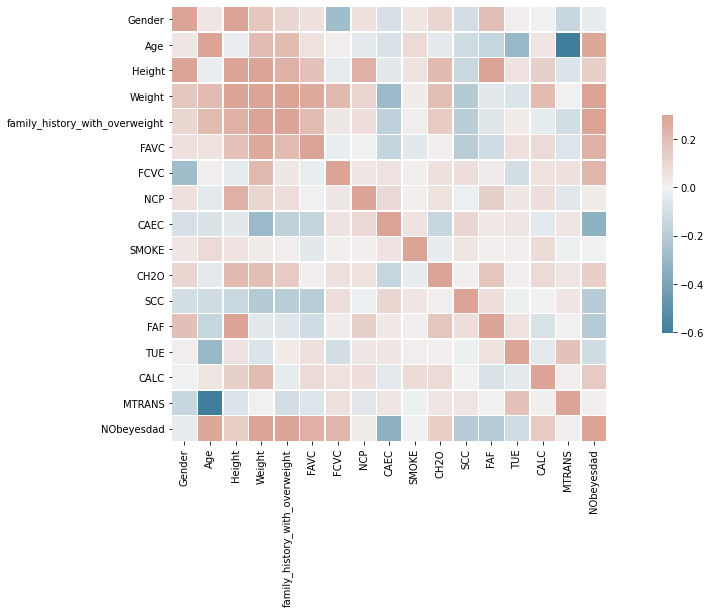

In [49]:
corr=df_cleaned.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
f, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

This second heatmap shows us the correlation rounded to 0,01

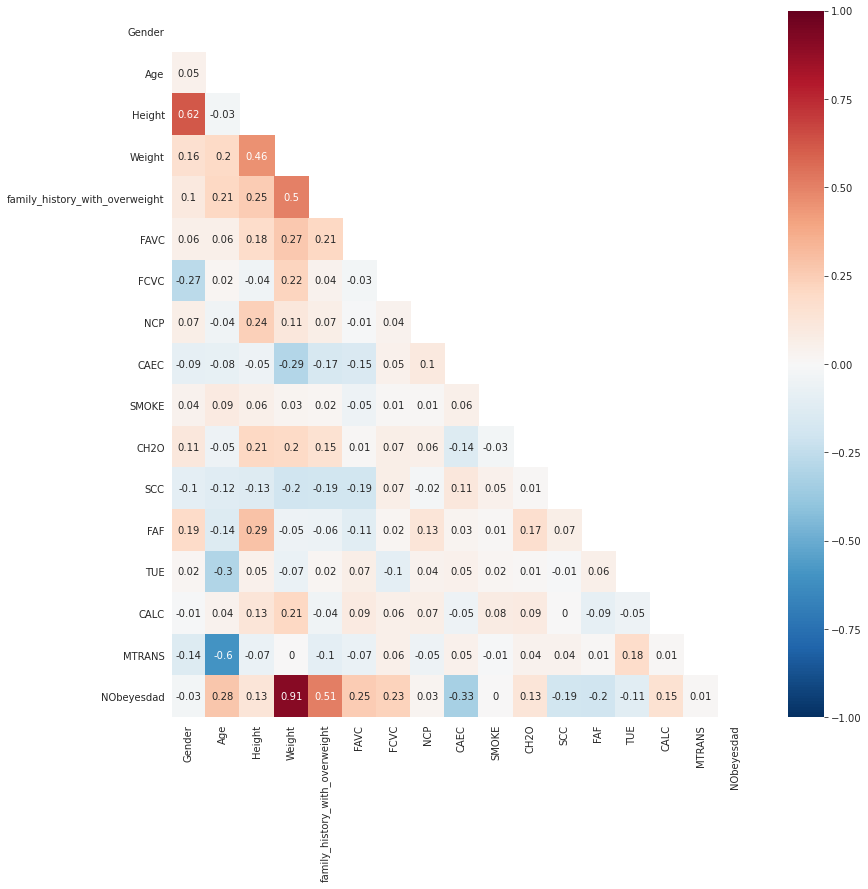

In [235]:
corr = df_cleaned.corr().round(2)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(13,13))
    sns.heatmap(ax=ax, data=corr, mask=mask, annot=True, center=0, vmin=-1, vmax=1, cmap="RdBu_r");

This heatmap allows us to retrieve the variables with the highest correlation with the target variable "NObeyesdad". The variables with the highest correlation are :
Age, Height, Weight, Familiy_history_with_overweight,FAVC, FCVC, CAEC, SCC and CALC

In [236]:
df_cleaned["Age"].describe()

count    2111.000000
mean       24.312600
std         6.345968
min        14.000000
25%        19.947192
50%        22.777890
75%        26.000000
max        61.000000
Name: Age, dtype: float64

The next step corresponds to a data visualization. To make a visualization in function of the Age, we have to create a class variable which will permit to make plots by using simple classes.
We create here four classes :

In [51]:
def categorize_age(age):
    if age<20:
        return "-20"
    if age>20 and age<30:
        return "20-30"
    if age>30 and age<40:
        return "30-40"
    if age>40:
        return "+40"

In [52]:
df_cleaned["Age_categories"]=df_cleaned["Age"].apply(categorize_age)

In [53]:
df_cleaned["Age_categories"].value_counts()

20-30    1162
-20       537
30-40     293
+40        57
Name: Age_categories, dtype: int64

In [54]:
gp=df_cleaned[["Age_categories","NObeyesdad"]].groupby("NObeyesdad")

In [107]:
gp.first()

,Age_categories
NObeyesdad,
0,None
1,20-30
2,20-30
3,20-30
4,20-30
5,None
6,20-30


The following plot shows the average obesity level for each age category

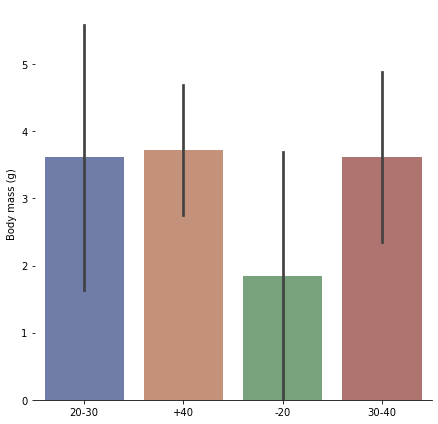

In [56]:
g = sns.catplot(
    data=df_cleaned, kind="bar",
    y="NObeyesdad", x="Age_categories", 
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")

Now, we see the proportion of people in each obesity level

Text(0, 0.5, 'Individuals')

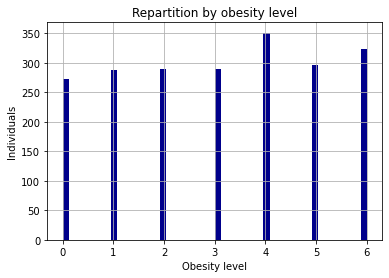

In [108]:
hist = df_cleaned.hist('NObeyesdad', bins = 50 ,color = 'DarkBlue')
pl.title("Repartition by obesity level")
pl.xlabel("Obesity level")
pl.ylabel("Individuals")

Plot of the familiy history with overweight for each obesity level using seaborn library

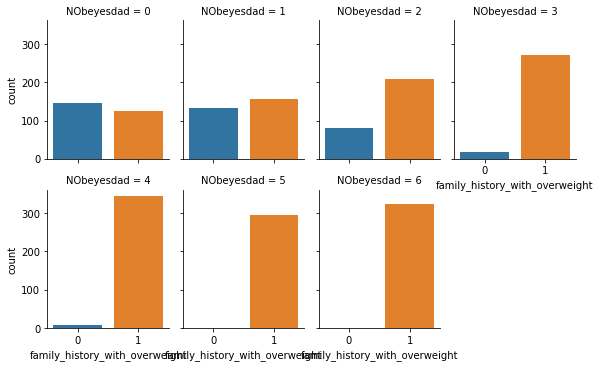

In [109]:
g = sns.catplot(x="family_history_with_overweight", col="NObeyesdad", col_wrap=4,
                data=df_cleaned,legend = True,
                kind="count", height=2.5, aspect=.8) 


In this plot, we use 3 variables : we plot the average obesity level for each answer category, by age category in function of the answer to the CALC question.
Same thing with the CAEC variable 

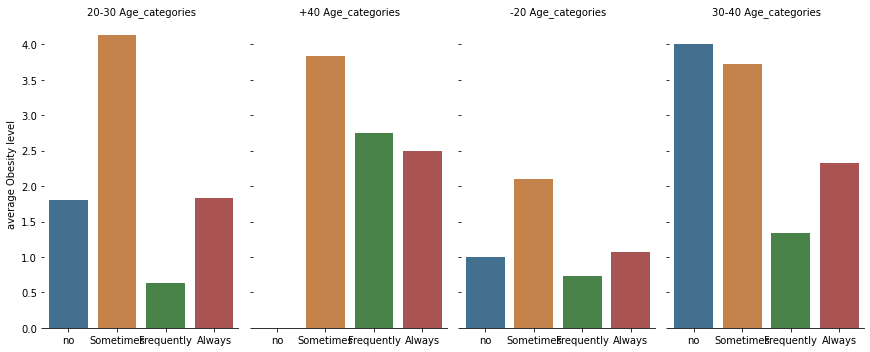

In [60]:
g = sns.catplot(x="CAEC", y="NObeyesdad", 
                col="Age_categories",
                data=df_cleaned, saturation=.5,
                kind="bar", ci=None, aspect=.6)

(g.set_axis_labels("", "average Obesity level")
  .set_xticklabels(["no","Sometimes","Frequently","Always"])
  .set_titles("{col_name} {col_var}")
  .despine(left=True))

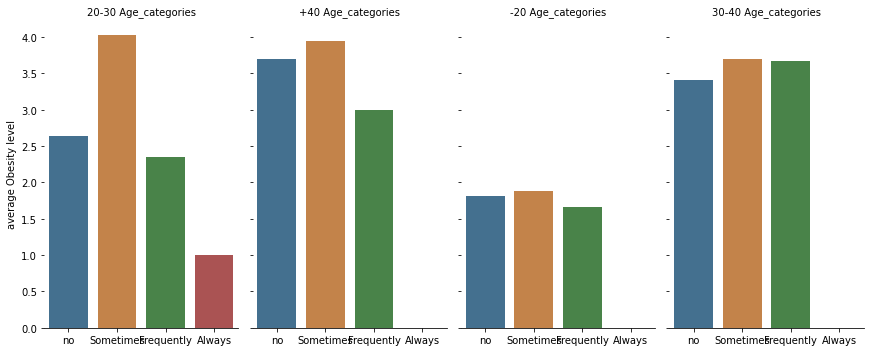

In [110]:
g = sns.catplot(x="CALC", y="NObeyesdad", 
                col="Age_categories",
                data=df_cleaned, saturation=.5,
                kind="bar", ci=None, aspect=.6)

(g.set_axis_labels("", "average Obesity level")
  .set_xticklabels(["no","Sometimes","Frequently","Always"])
  .set_titles("{col_name} {col_var}")
  .despine(left=True))

In [62]:
df_cleaned["family_history_with_overweight"].value_counts()

1    1726
0     385
Name: family_history_with_overweight, dtype: int64

graphs a interpreter


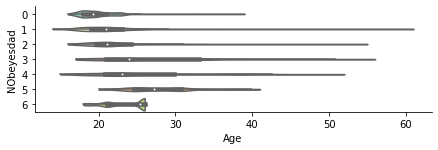

In [63]:
gr = sns.catplot(x="Age", y="NObeyesdad",
                data=df_cleaned,
                orient="h", height=2, aspect=3, palette="Set3",
                kind="violin", dodge=True, cut=0, bw=.2)

Here we plot the Obesity level in function of the SMOKE variable to see if there is a correlation

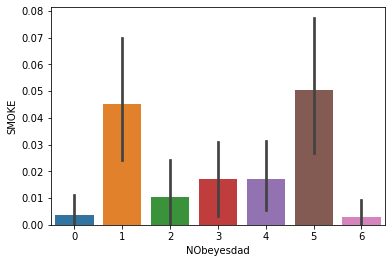

In [64]:
ax = sns.barplot(y="SMOKE", x="NObeyesdad", data=df_cleaned)

## Processing the data with the variables we keep to create a model

New pandas data frame created with our variables

In [121]:
data = pd.DataFrame(df_cleaned[["Age","Age_categories","Weight","Height","family_history_with_overweight", "FAVC","FCVC","FAF","CAEC","NObeyesdad"]])

In [122]:
data

,Age,Age_categories,Weight,Height,family_history_with_overweight,FAVC,FCVC,FAF,CAEC,NObeyesdad
0,21.000000,20-30,64.000000,1.620000,1,0,2.0,0.000000,1,1
1,21.000000,20-30,56.000000,1.520000,1,0,3.0,3.000000,1,1
2,23.000000,20-30,77.000000,1.800000,1,0,2.0,2.000000,1,1
3,27.000000,20-30,87.000000,1.800000,0,0,3.0,2.000000,1,2
4,22.000000,20-30,89.800000,1.780000,0,0,2.0,0.000000,1,3
...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,20-30,131.408528,1.710730,1,1,3.0,1.676269,1,6
2107,21.982942,20-30,133.742943,1.748584,1,1,3.0,1.341390,1,6
2108,22.524036,20-30,133.689352,1.752206,1,1,3.0,1.414209,1,6
2109,24.361936,20-30,133.346641,1.739450,1,1,3.0,1.139107,1,6


We separate the data into a set containing the features and a set containing the target variable

In [68]:
target = "NObeyesdad"

In [136]:
x= data[["Age","Weight","Height","family_history_with_overweight","FAVC","FAF","FCVC","CAEC"]]
y= data[target]

In [137]:
x

,Age,Weight,Height,family_history_with_overweight,FAVC,FAF,FCVC,CAEC
0,21.000000,64.000000,1.620000,1,0,0.000000,2.0,1
1,21.000000,56.000000,1.520000,1,0,3.000000,3.0,1
2,23.000000,77.000000,1.800000,1,0,2.000000,2.0,1
3,27.000000,87.000000,1.800000,0,0,2.000000,3.0,1
4,22.000000,89.800000,1.780000,0,0,0.000000,2.0,1
...,...,...,...,...,...,...,...,...
2106,20.976842,131.408528,1.710730,1,1,1.676269,3.0,1
2107,21.982942,133.742943,1.748584,1,1,1.341390,3.0,1
2108,22.524036,133.689352,1.752206,1,1,1.414209,3.0,1
2109,24.361936,133.346641,1.739450,1,1,1.139107,3.0,1


In [71]:
y

0       1
1       1
2       1
3       2
4       3
       ..
2106    6
2107    6
2108    6
2109    6
2110    6
Name: NObeyesdad, Length: 2111, dtype: int64

##### separation of the sets into subsets : a train set and a test set, for the features and the target variable : we use the train_tes_split function, precising the ratio

In [138]:
X_train, X_test,Y_train,Y_test=train_test_split(x, y, test_size= 0.3)

In [139]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1477, 8)
(634, 8)
(1477,)
(634,)


##### Scaling the data : normalization 

Normalization avoid a great variation between the distances calculated in the different models 

In [140]:
minmax_scale = MinMaxScaler().fit(X_train)

In [238]:
X_train = minmax_scale.transform(X_train)
X_test = minmax_scale.transform(X_test)

### First model created : DecisionTreeClassifier

Here, we have to create a model and fit it to the data, but only to the train set to avoid overfitting.
Then we make a prediction and calculate the accuracy score.

In [142]:
model=DecisionTreeClassifier( )
model.fit(X_train,Y_train)
print(model.score(X_train,Y_train))
print(model.predict(X_test))
print(model.score(X_test,Y_test))

1.0
[2 2 3 6 2 2 6 4 0 3 1 5 0 4 6 2 3 3 0 1 4 3 5 6 1 0 5 6 3 2 0 5 2 5 4 2 6
 0 5 2 3 3 5 3 4 3 0 6 0 1 6 4 1 3 1 0 6 0 2 2 4 4 6 1 6 5 1 6 2 2 6 2 0 0
 6 4 2 0 4 4 4 5 1 3 6 6 2 4 0 6 3 4 0 3 5 6 6 6 6 2 3 1 0 5 5 5 4 5 6 5 2
 6 5 3 4 6 6 1 1 3 6 3 2 3 3 0 0 2 2 3 3 0 6 0 3 0 6 6 6 1 5 5 4 1 1 6 4 0
 5 0 1 6 2 6 2 1 4 5 5 4 2 4 6 6 2 0 2 4 4 1 4 3 1 5 5 5 5 5 1 6 0 6 2 4 5
 1 4 2 4 3 4 0 2 3 6 5 6 0 3 1 5 5 5 6 3 2 6 1 2 4 5 2 5 5 2 1 1 0 4 6 5 0
 0 4 3 5 6 2 0 3 6 6 0 3 5 3 6 1 4 1 0 2 0 4 5 6 5 0 5 1 3 1 3 6 1 6 1 2 6
 3 1 3 1 4 2 6 3 6 1 6 5 6 4 5 6 2 3 0 1 3 2 6 0 0 4 2 3 0 2 1 0 4 1 0 4 1
 3 0 6 0 2 1 6 2 0 2 4 6 5 5 4 0 0 0 2 6 3 6 2 4 1 1 2 0 2 4 4 4 1 1 2 1 3
 5 5 4 6 5 4 6 6 5 6 4 6 6 6 2 6 4 0 6 3 0 5 1 5 0 5 5 0 2 4 1 2 5 2 3 4 2
 1 4 6 6 2 2 6 5 3 3 1 2 4 2 6 1 4 6 3 2 6 4 6 3 5 4 4 1 5 1 3 4 4 4 0 4 4
 1 6 6 4 5 5 3 5 3 1 0 4 2 3 5 0 5 2 0 3 0 6 3 2 0 4 4 2 2 4 0 2 4 1 5 3 4
 5 4 3 5 3 2 3 0 0 4 6 2 1 0 5 5 5 2 1 1 2 6 2 3 0 4 3 6 3 2 0 0 2 3 0 5 1
 5 5 1 3 6 3 3 4 1 5 

### Second model : RandomForestClassifier

In this part, we process the data the same way as before but using a random forest classifier model and we give it a number of iterations

In [146]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

#print(random_forest.score(X_train, Y_train))
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest_test = round(random_forest.score(X_test, Y_test) * 100, 2)
print(acc_random_forest_test)

95.9


Here, we take a look at the different parameters used by the RandomForestClassifier model, to know what we can change when using GridSearch function.

In [99]:
print('Parameters currently in use:\n')
print(random_forest.get_params())


Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


grid search : to improve the model by changing the hyperparameters.
Here, we try several models with different parameters in lists and we change the list according to the gridsearch answer. It gives us the best combination with the value we entered in the list. Since we did the search manually, it doesn't give the best results, even if we tried multiple combinations. We kept as the best score, the parameters set in the basic previous randomforestClassifier model.

In [151]:
from sklearn.model_selection import GridSearchCV
random_grid = {'bootstrap': [True, False],
 'max_depth': [20, 30,35, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5],
 'n_estimators': [400,600,700]}
rf = RandomForestClassifier()
rf_random = GridSearchCV(estimator = rf, 
                               param_grid= random_grid, 
                                cv = 3, verbose=2, 
                             n_jobs = -1)

rf_random.fit(X_train, Y_train)

print(rf_random.best_params_)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:  3.0min finished


{'bootstrap': False, 'max_depth': 35, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 600}


Here are the best parameters that we found, trying to change the hyperparameters of the grid.

In [152]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 35,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 600}

In [153]:
rf_random.best_score_

0.932308415376243

The last model we implement is based on the KNN algorithm : KNeighborsClassifier.
    This model needs to begin with a number of neighbors that we first set to 2. We changed the values until we found as the best result for this model : k=3

In [147]:
modelKNN_1 = KNeighborsClassifier(n_neighbors = 3)
modelKNN_1.fit(X_train, Y_train)
print('train score', modelKNN_1.score(X_train,Y_train))
print('test score', modelKNN_1.score(X_test,Y_test))

train score 0.8957345971563981
test score 0.807570977917981


The study of different models allows us to choose the model with the best accuracy score. We know that in our dataset, the prediction gives the best accuracy score with the RandomForestClassifier Model. 

### Comparaison with a model based on the complete dataset

#### We process the data the same way we did for the previous models

In [194]:
columns = df_cleaned.columns.tolist()
columns.remove('NObeyesdad')
columns.remove('Age_categories')
x2 = df_cleaned[columns]
y2 = df_cleaned['NObeyesdad']

In [204]:
x2

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,3
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,3
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,3
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,4
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,3
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,3
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,3
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,3


##### separation of the data

In [205]:
X2_train, X2_test,Y2_train,Y2_test=train_test_split(x2, y2, test_size= 0.3)

##### scaling 

In [196]:
minmax_scale_2 = MinMaxScaler().fit(X2_train)

In [207]:
X2_train = minmax_scale_2.transform(X2_train)
X2_test = minmax_scale_2.transform(X2_test)

##### First model : decision tree classifier 

In [208]:
model2=DecisionTreeClassifier( )
model2.fit(X2_train,Y2_train)
print(model2.score(X2_train,Y2_train))
model2.predict(X2_test)
print(model2.score(X2_test,Y2_test))

1.0
0.917981072555205


##### Second model : KNeighbors Classifier 

In [142]:
modelKNN = KNeighborsClassifier(n_neighbors = 3)
modelKNN.fit(X2_train, Y2_train)
print('train score', modelKNN.score(X2_train,Y2_train))
print('test score', modelKNN.score(X2_test,Y2_test))

train score 0.8490182802979012
test score 0.749211356466877


##### Third model (best model) : Random forest classifier 

In [241]:
random_forest_complet = RandomForestClassifier(n_estimators=100)
random_forest_complet.fit(X2_train, Y2_train)

Y_prediction_RF_complet = random_forest_complet.predict(X2_test)

acc_random_forest_comp = round(random_forest_complet.score(X2_test, Y2_test) * 100, 2)
print(acc_random_forest_comp)

94.48


Our comparaison gives us a confirmation that the prediction is more correct when using only the variables we found the most correlated. The best model for predictions that we have is the RandomForestClassifier with the 8 variables we chose. 

## To go further : Models for prediction of the variable "Weight"

Since we have worked on a classification problem, we can now try to use another variable that we can predict by using a regression model. This was not on the frame of our study.

The variable we chose to study is the "Weight", since it is the most correlated with our target variable.

As we did it for the previous study, we create a dataframe, based on the correlations between weight and the other variables, that we can see on the heatmap.

We first use a model with only the 6 most correlated variables

In [242]:
x_poids=df_cleaned[["FAVC","CAEC","family_history_with_overweight","NObeyesdad","FCVC","CALC"]]#based on correlation of weight
y_poids=df_cleaned["Weight"]
x_poids_train, x_poids_test,y_poids_train,y_poids_test=train_test_split(x_poids, y_poids, test_size= 0.3)

We first used a Bayesian Ridge Model and fit it to our train data that is used for regression problems 

In [213]:
from sklearn.linear_model import BayesianRidge
reg = BayesianRidge()
reg.fit(x_poids_train, y_poids_train)

BayesianRidge()

In [214]:
pred=reg.predict(x_poids_test)

In [216]:
from sklearn.metrics import accuracy_score

In [217]:
test=pd.DataFrame(y_poids_test)
test["pred"]=pred
test

,Weight,pred
288,51.000000,57.259816
406,66.500000,57.271692
1516,102.810704,106.477289
1397,86.002736,94.750679
314,63.000000,57.259816
...,...,...
487,104.000000,91.646717
1235,95.361795,94.583066
139,68.000000,57.906411
216,63.000000,62.670392


After making a prediction, we compute the MSE (mean squared error) function to compare the different models.
The score obtained is ~ 105.8

In [218]:
from sklearn.metrics import mean_squared_error

mean_squared_error(pred,y_poids_test)

105.81158807466318

Here we compute another model based on the same algorithm, but with 8 correlated variables. The MSE gets a little lower but not significatively

In [219]:
x_poids=df_cleaned[["FAVC","CAEC","family_history_with_overweight","NObeyesdad","FCVC","CALC","CH2O","SCC"]]#based on correlation of weight
y_poids=df_cleaned["Weight"]
x_poids_train, x_poids_test,y_poids_train,y_poids_test=train_test_split(x_poids, y_poids, test_size= 0.3)

from sklearn.linear_model import BayesianRidge
reg = BayesianRidge()
reg.fit(x_poids_train, y_poids_train)

pred=reg.predict(x_poids_test)

from sklearn.metrics import mean_squared_error

mean_squared_error(pred,y_poids_test)

103.66713709261523

The next model is based on the same algorithm but with the 9 most correlated variables. It lewers significatively the MSE score

In [220]:
x_poids=df_cleaned[["FAVC","CAEC","family_history_with_overweight","NObeyesdad","FCVC","CALC","CH2O","SCC","NCP"]]#based on correlation of weight
y_poids=df_cleaned["Weight"]
x_poids_train, x_poids_test,y_poids_train,y_poids_test=train_test_split(x_poids, y_poids, test_size= 0.3)

from sklearn.linear_model import BayesianRidge
reg = BayesianRidge()
reg.fit(x_poids_train, y_poids_train)

pred=reg.predict(x_poids_test)

from sklearn.metrics import mean_squared_error

mean_squared_error(pred,y_poids_test)

89.37417076655946

In [221]:
test=pd.DataFrame(y_poids_test)
test["pred"]=pred
test

,Weight,pred
1047,78.790936,83.751162
101,66.400000,59.404798
1708,100.209405,99.360067
793,60.628321,68.348161
769,75.000000,78.811318
...,...,...
780,85.079589,76.970786
962,61.616000,69.794530
753,75.000000,75.414689
878,69.975607,73.412296


The 3 next models use the DesicionTreeRegressor, LinearRegression() and RandomForestRegressor() models, using the last dataset of 9 variables. 

In [222]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_poids_train,y_poids_train)

pred=regressor.predict(x_poids_test)

from sklearn.metrics import mean_squared_error

mean_squared_error(pred,y_poids_test)

115.39955021566955

In [223]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_poids_train,y_poids_train)

pred=regressor.predict(x_poids_test)

from sklearn.metrics import mean_squared_error

mean_squared_error(pred,y_poids_test)


89.4078083168615

In [224]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(random_state=0)
regressor.fit(x_poids_train,y_poids_train)

pred=regressor.predict(x_poids_test)

from sklearn.metrics import mean_squared_error

mean_squared_error(pred,y_poids_test)

77.96579620251225

We can understand regarding the MSE score that the best model so far is the RandomForestRegressor with the 9 variables :
    "FAVC","CAEC","family_history_with_overweight",
    "NObeyesdad","FCVC","CALC","CH2O","SCC","NCP"

In [225]:
test=pd.DataFrame(y_poids_test)
test["pred"]=pred
test

,Weight,pred
1047,78.790936,74.473767
101,66.400000,67.907917
1708,100.209405,99.769010
793,60.628321,66.856441
769,75.000000,72.125671
...,...,...
780,85.079589,82.669584
962,61.616000,65.229453
753,75.000000,73.987632
878,69.975607,77.591643


In [226]:
from sklearn.model_selection import GridSearchCV

In [227]:
parameters = {"n_estimators":[10,100]}

In [228]:
clf = GridSearchCV(regressor, parameters)
clf.fit(x_poids_train,y_poids_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'n_estimators': [10, 100]})

In [229]:
clf.cv_results_

{'mean_fit_time': array([0.04309816, 0.38953061]),
 'std_fit_time': array([0.00559976, 0.06128849]),
 'mean_score_time': array([0.00396075, 0.01580229]),
 'std_score_time': array([0.00113433, 0.00299366]),
 'param_n_estimators': masked_array(data=[10, 100],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10}, {'n_estimators': 100}],
 'split0_test_score': array([0.89296998, 0.90471186]),
 'split1_test_score': array([0.87517267, 0.88112122]),
 'split2_test_score': array([0.86583586, 0.87598647]),
 'split3_test_score': array([0.88086815, 0.88803649]),
 'split4_test_score': array([0.88520467, 0.89296936]),
 'mean_test_score': array([0.88001027, 0.88856508]),
 'std_test_score': array([0.00916502, 0.0099401 ]),
 'rank_test_score': array([2, 1])}

In [230]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=90,random_state=0)
regressor.fit(x_poids_train,y_poids_train)

pred=regressor.predict(x_poids_test)

from sklearn.metrics import mean_squared_error

mean_squared_error(pred,y_poids_test)

77.59702249710749

The last model is based on the RandomForestRegressor algorithm with the last dataset composed by the 9 variables. 
It is an interesting study that shows we can use variables to predict another one, but we can also invert the roles of the variables to select another target variable. It changes the dimension of the problem, converting it from a classification problem to a regression problem.